<a href="https://colab.research.google.com/github/bhawanamehraa/CODSOFT/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [250]:

df=pd.read_csv(r"/content/fraudTrain.csv")

In [253]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [252]:

df.shape

(42831, 23)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42831 entries, 0 to 42830
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42831 non-null  int64  
 1   trans_date_trans_time  42831 non-null  object 
 2   cc_num                 42831 non-null  int64  
 3   merchant               42831 non-null  object 
 4   category               42831 non-null  object 
 5   amt                    42831 non-null  float64
 6   first                  42831 non-null  object 
 7   last                   42831 non-null  object 
 8   gender                 42831 non-null  object 
 9   street                 42831 non-null  object 
 10  city                   42831 non-null  object 
 11  state                  42831 non-null  object 
 12  zip                    42831 non-null  int64  
 13  lat                    42831 non-null  float64
 14  long                   42831 non-null  float64
 15  ci

In [254]:

df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [255]:

df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,42831.000000,4.283100e+04,42831.000000,42831.000000,42831.000000,42831.000000,4.283000e+04,4.283000e+04,42830.000000,42830.000000,42830.000000
mean,21415.000000,4.178002e+17,71.563338,48733.948939,38.536225,-90.241386,8.852743e+04,1.326469e+09,38.536078,-90.247263,0.009269
std,12364.389027,1.310122e+18,151.062206,27017.786941,5.091000,13.953112,2.977794e+05,6.255365e+05,5.121287,13.962830,0.095831
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,10707.500000,1.800429e+14,9.690000,25832.000000,34.668900,-96.809400,7.430000e+02,1.325940e+09,34.785872,-96.940941,0.000000
50%,21415.000000,3.519607e+15,47.970000,48088.000000,39.346500,-87.456900,2.456000e+03,1.326489e+09,39.348741,-87.366152,0.000000
75%,32122.500000,4.642255e+15,83.680000,72042.000000,41.846700,-80.128400,2.047800e+04,1.327043e+09,41.924197,-80.174018,0.000000
max,42830.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-12.000000,2.906700e+06,1.327591e+09,66.659242,-66.967742,1.000000


In [256]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

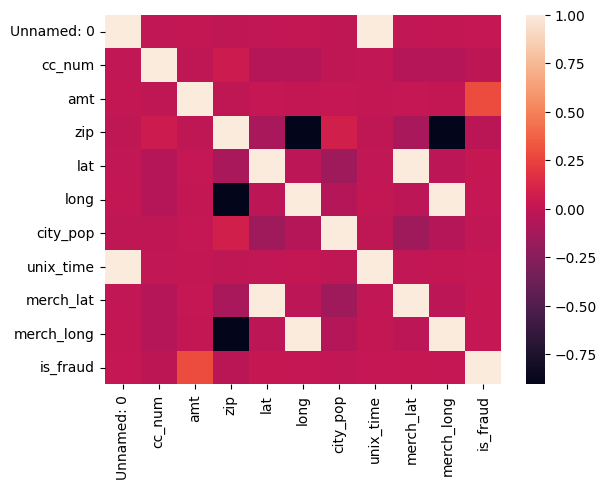

In [257]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Now you can safely compute the correlation matrix and create a heatmap
sns.heatmap(numeric_df.corr())
plt.show()

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42831 entries, 0 to 42830
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42831 non-null  int64  
 1   trans_date_trans_time  42831 non-null  object 
 2   cc_num                 42831 non-null  int64  
 3   merchant               42831 non-null  object 
 4   category               42831 non-null  object 
 5   amt                    42831 non-null  float64
 6   first                  42831 non-null  object 
 7   last                   42831 non-null  object 
 8   gender                 42831 non-null  object 
 9   street                 42831 non-null  object 
 10  city                   42831 non-null  object 
 11  state                  42831 non-null  object 
 12  zip                    42831 non-null  int64  
 13  lat                    42831 non-null  float64
 14  long                   42831 non-null  float64
 15  ci

In [259]:
df['is_fraud'].value_counts()

is_fraud
0.0    42433
1.0      397
Name: count, dtype: int64

In [260]:
legit=df[df.is_fraud==0]
fraud =df[df.is_fraud==1]

In [261]:
print(legit.shape)
print(fraud.shape)

(42433, 23)
(397, 23)


In [310]:
legit.amt.describe()

count    42433.000000
mean        67.307386
std        140.034961
min          1.000000
25%          9.620000
50%         47.630000
75%         82.740000
max      11872.210000
Name: amt, dtype: float64

In [263]:
fraud.amt.describe()

count     397.000000
mean      526.591209
std       396.699014
min         4.500000
25%       187.350000
50%       353.060000
75%       905.280000
max      1334.070000
Name: amt, dtype: float64

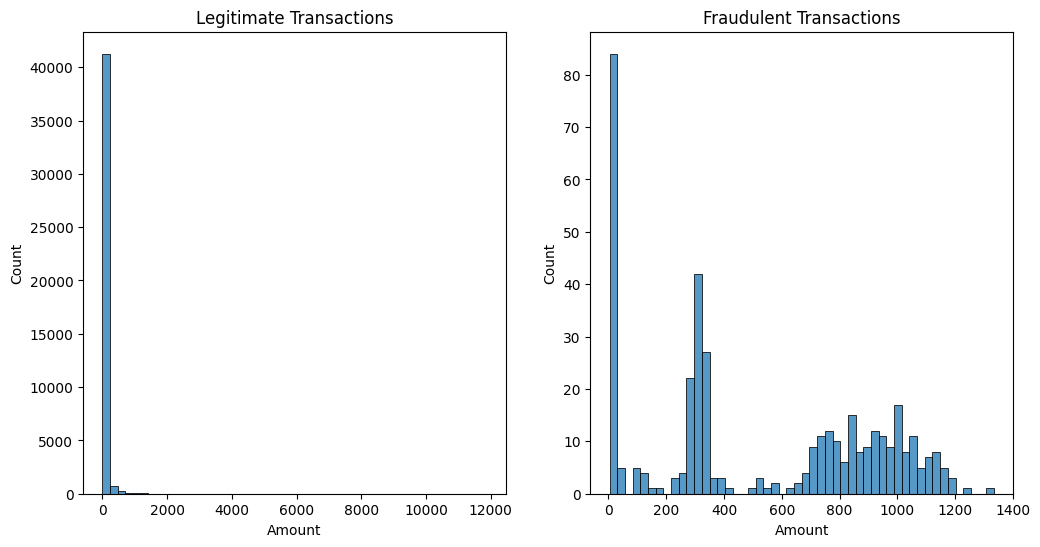

In [293]:
#compare the values for both transactions

import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Distribution of transaction amounts for legitimate transactions
plt.subplot(1, 2, 1)
sns.histplot(legit['amt'], bins=50)
plt.title('Legitimate Transactions')
plt.xlabel('Amount')
plt.ylabel('Count')

# Subplot 2: Distribution of transaction amounts for fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(fraud['amt'], bins=50)
plt.title('Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Count')

# Show the plot
plt.show()


In [306]:
df['is_fraud'] = pd.to_numeric(df['is_fraud'], errors='coerce')

In [307]:
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time            object
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
is_fraud_binary                   int64
dtype: object

In [309]:
# Assuming 'df' is your DataFrame
numeric_cols = df.select_dtypes(include=[np.number])  # Select only numeric columns
means = numeric_cols.mean()  # Calculate the mean of each numeric column


In [314]:
legit_sample =legit.sample(n=397)

In [315]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [316]:

new_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
7242,7242,2019-01-05 18:28:36,3550554389581384,fraud_Kutch-Wilderman,home,62.77,Ryan,Foster,M,03921 Cole Mission Suite 882,...,29.8575,-82.1483,2060.0,Oncologist,1983-11-10,8ca7ca8cab5fdf0ab46a71a218c1e76e,1.325788e+09,30.076679,-82.342208,0.0
21468,21468,2019-01-13 21:41:00,4427805710168,fraud_Schiller Ltd,personal_care,40.99,Michelle,Rodriguez,F,1742 Brandon Squares Apt. 461,...,33.3305,-105.6933,8874.0,Licensed conveyancer,2000-08-16,e4592986c42b04195fd09e5bc3a754d9,1.326491e+09,33.722995,-105.404974,0.0
9668,9668,2019-01-06 23:53:39,639023984367,"fraud_Lesch, D'Amore and Brown",food_dining,5.58,Destiny,Lowe,F,79472 Stevens Trace Apt. 120,...,44.6087,-74.9732,69.0,Chief Executive Officer,1991-06-05,e73aaec29cb8f1fd79bb0909a1901506,1.325894e+09,43.717405,-75.558974,0.0
37817,37817,2019-01-22 19:40:14,630423337322,fraud_Medhurst Inc,home,15.51,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,85b20f7dd0a0798b27cc4b7df3ceff75,1.327261e+09,48.500389,-117.846340,0.0
19750,19750,2019-01-13 00:18:12,375974680629816,fraud_Murray Ltd,grocery_net,10.91,Roberta,Mccarthy,F,94431 Matthew Mall Suite 296,...,41.6611,-73.0449,2376.0,Herpetologist,1973-04-06,f00e56d164ef5f8dcaff905ec5663db3,1.326414e+09,42.435726,-72.462775,0.0


In [317]:

new_dataset.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
40806,40806,2019-01-25 01:05:09,4257110907449569602,fraud_Friesen-D'Amore,gas_transport,10.02,Ryan,Anderson,M,254 Webster Harbor,...,43.9886,-88.7712,149.0,"Engineer, building services",2000-02-15,59e177ed7c1524799a201c6d957907e2,1.327454e+09,43.364576,-88.554937,1.0
41927,41927,2019-01-25 22:14:49,4257110907449569602,fraud_Gottlieb Group,kids_pets,19.05,Ryan,Anderson,M,254 Webster Harbor,...,43.9886,-88.7712,149.0,"Engineer, building services",2000-02-15,1b79ef2dea493f112ce5e1cfdc9b7958,1.327530e+09,43.736699,-89.715061,1.0
41964,41964,2019-01-25 22:45:52,4257110907449569602,fraud_Torphy-Goyette,shopping_pos,1172.01,Ryan,Anderson,M,254 Webster Harbor,...,43.9886,-88.7712,149.0,"Engineer, building services",2000-02-15,999eee3eaf7f5c9729f7d2294b620f3c,1.327532e+09,43.040053,-89.274051,1.0
42018,42018,2019-01-25 23:37:16,4257110907449569602,fraud_Kassulke PLC,shopping_net,1075.29,Ryan,Anderson,M,254 Webster Harbor,...,43.9886,-88.7712,149.0,"Engineer, building services",2000-02-15,dee2715a016bf7ff5620fe8bfe69b9fd,1.327535e+09,43.081870,-88.189221,1.0
42026,42026,2019-01-25 23:42:45,4257110907449569602,"fraud_Ferry, Lynch and Kautzer",misc_net,775.10,Ryan,Anderson,M,254 Webster Harbor,...,43.9886,-88.7712,149.0,"Engineer, building services",2000-02-15,790e4e7cbe8bf761b0c76360bd09cb5f,1.327535e+09,44.486682,-87.826353,1.0


In [318]:
df['is_fraud'].value_counts()

is_fraud
0    100
Name: count, dtype: int64

In [319]:
new_dataset['is_fraud'].value_counts()

is_fraud
0.0    397
1.0    397
Name: count, dtype: int64

In [347]:

X = new_dataset.drop(columns='is_fraud', axis=1)
Y = new_dataset['is_fraud']


In [359]:
print(X)

       Unnamed: 0 trans_date_trans_time               cc_num  \
7242         7242   2019-01-05 18:28:36     3550554389581384   
21468       21468   2019-01-13 21:41:00        4427805710168   
9668         9668   2019-01-06 23:53:39         639023984367   
37817       37817   2019-01-22 19:40:14         630423337322   
19750       19750   2019-01-13 00:18:12      375974680629816   
...           ...                   ...                  ...   
40806       40806   2019-01-25 01:05:09  4257110907449569602   
41927       41927   2019-01-25 22:14:49  4257110907449569602   
41964       41964   2019-01-25 22:45:52  4257110907449569602   
42018       42018   2019-01-25 23:37:16  4257110907449569602   
42026       42026   2019-01-25 23:42:45  4257110907449569602   

                             merchant       category      amt      first  \
7242            fraud_Kutch-Wilderman           home    62.77       Ryan   
21468              fraud_Schiller Ltd  personal_care    40.99   Michelle   
966

In [372]:
# prompt: remove values which are not numeric from X and Y

import pandas as pd

# Assuming `X` and `Y` are your DataFrames
X = X.select_dtypes(include=[np.number])
Y = Y.apply(pd.to_numeric, errors='coerce')

# Print the updated DataFrames
print(X)
print(Y)


       Unnamed: 0               cc_num      amt    zip      lat      long  \
7242         7242     3550554389581384    62.77  32044  29.8575  -82.1483   
21468       21468        4427805710168    40.99  88355  33.3305 -105.6933   
9668         9668         639023984367     5.58  13647  44.6087  -74.9732   
37817       37817         630423337322    15.51  99160  48.8878 -118.2105   
19750       19750      375974680629816    10.91   6782  41.6611  -73.0449   
...           ...                  ...      ...    ...      ...       ...   
40806       40806  4257110907449569602    10.02  54980  43.9886  -88.7712   
41927       41927  4257110907449569602    19.05  54980  43.9886  -88.7712   
41964       41964  4257110907449569602  1172.01  54980  43.9886  -88.7712   
42018       42018  4257110907449569602  1075.29  54980  43.9886  -88.7712   
42026       42026  4257110907449569602   775.10  54980  43.9886  -88.7712   

       city_pop     unix_time  merch_lat  merch_long  
7242     2060.0  1.3

In [373]:
print(Y)

7242     0.0
21468    0.0
9668     0.0
37817    0.0
19750    0.0
        ... 
40806    1.0
41927    1.0
41964    1.0
42018    1.0
42026    1.0
Name: is_fraud, Length: 794, dtype: float64


In [331]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [332]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75, 8)
(75,)
(25, 8)
(25,)


In [374]:

model = LogisticRegression()

In [381]:
Y_train = Y_train.astype(float)

In [382]:
Y_train = Y_train[Y_train.apply(lambda x: isinstance(x, (int, float)))]

In [383]:
Y_train = pd.get_dummies(Y_train)

In [384]:
model.fit(X_train, Y_train)

ValueError: could not convert string to float: '2019-01-11 23:19:13'

In [380]:
model.fit(X_train, Y_train)

ValueError: could not convert string to float: '2019-01-11 23:19:13'

In [ ]:


# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:

print('Accuracy on Training data : ', training_data_accuracy)

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [335]:
print('Accuracy score on Test Data : ', test_data_accuracy)

NameError: name 'test_data_accuracy' is not defined